# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  We will load and view the data using a package called `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.dpi"] = 300
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.tight_layout()

<Figure size 720x360 with 0 Axes>

In [3]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [4]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [5]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

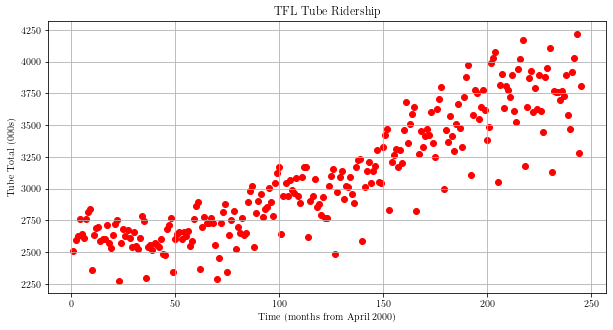

In [6]:
#Your code for scatterplot here

plt.scatter(xvals, yvals, color='red')
plt.title('TFL Tube Ridership')
plt.xlabel('Time (months from April 2000)')
plt.ylabel('Tube Total (000s)')
plt.grid()
plt.show()

## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta0 and beta1 are [2367.38176648    5.93899012]
Mean squared error for linear model is 45323.636
R-squared for linear model is 0.796


C:\Users\louis\AppData\Local\Temp\ipykernel_5372\3186258043.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((xvals**i for i in range(2)))


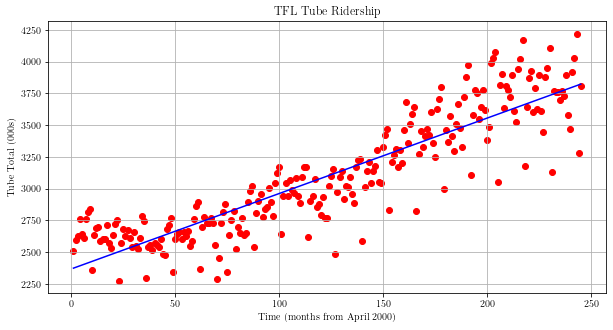

In [7]:
#Your code here
X = np.column_stack((xvals**i for i in range(2)))
beta, _, _, _ = np.linalg.lstsq(X, yvals, rcond=None)
res = yvals - np.dot(X, beta)
fit = np.dot(X, beta)

print(f'beta0 and beta1 are {beta}')
# plot 
plt.scatter(xvals, yvals, color='red')
plt.plot(xvals, fit, color='blue')
plt.title('TFL Tube Ridership')
plt.xlabel('Time (months from April 2000)')
plt.ylabel('Tube Total (000s)')

SSE = np.sum((yvals - np.mean(yvals))**2)
SSE_linear = np.sum(res**2)
MSE_linear = SSE_linear/np.size(yvals)
print(f'Mean squared error for linear model is {MSE_linear:.3f}')
R2 = 1 - SSE_linear/SSE
print(f'R-squared for linear model is {R2:.3f}')

plt.grid()
plt.show()

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

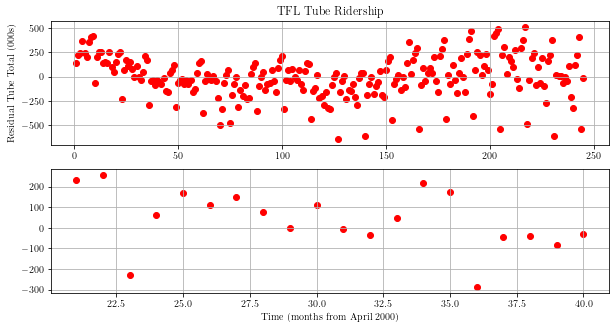

In [8]:
# Your code here
#plt.scatter(xvals, res, color='red')


plt.subplot(2,1,1)
plt.title('TFL Tube Ridership')
plt.ylabel('Residual Tube Total (000s)')
plt.scatter(xvals, res, color='red')
plt.grid()

plt.subplot(2,1,2)
plt.scatter(xvals[20:40], res[20:40], color='red')
plt.xlabel('Time (months from April 2000)')
plt.grid()

plt.show()

< Comment on periodic components here >
Occasional periodic tendancies at a higher frequency however their are also many outliers which could be random or part of another or many other different periodic tendancies at different frequencies

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


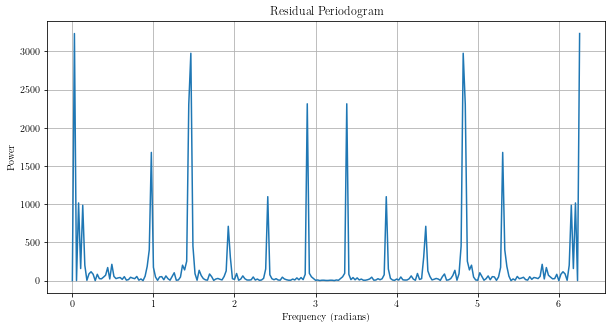

In [9]:
# Your code to compute and plot the histogram
N = np.size(res)
dft = np.abs(np.fft.fft(res, N) / N) ** 2

dt = xvals[201] - xvals[200]
indicies = np.linspace(0, N-1, N)
freqs_hz = indicies / (N * dt)
freqs_rads = 2 * np.pi * freqs_hz

plt.plot(freqs_rads, dft)
plt.title('Residual Periodogram')
plt.xlabel('Frequency (radians)')
plt.ylabel('Power')
plt.grid()
plt.show()

In [10]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum

half_max = np.max(dft) / 2
indicies = np.where(dft > half_max)
important_freq = freqs_rads[ indicies ]
important_mag = dft[ indicies ]
print(f'indicies: {indicies}')
print(f'frequencies (rad) {important_freq}')

indicies: (array([  1,  38,  56,  57, 113, 132, 188, 189, 207, 244], dtype=int64),)
frequencies (rad) [0.02564565 0.97453486 1.43615664 1.4618023  2.89795894 3.38522637
 4.82138301 4.84702867 5.30865044 6.25753965]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

Mean squared error MSE for linear + sinusoid model is: 21787.559
R^2 for linear + sinusoid model is: 0.902


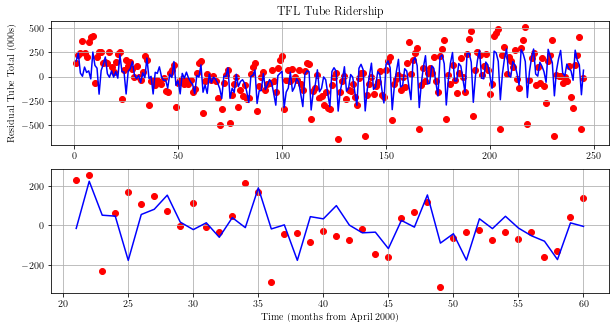

In [11]:
# Your code here
X = np.vstack([[np.sin(w*xvals), np.cos(w*xvals)] for w in important_freq]).T
#X = np.vstack((np.sin(w*xvals), np.cos(w*xvals))).T
beta_sc = np.linalg.inv(X.T @ X) @ X.T @ res
res_sc = res - np.dot(X, beta_sc)
fit_sc = np.dot(X, beta_sc)

plt.subplot(2,1,1)
plt.scatter(xvals, res, color='red')
plt.plot(xvals, fit_sc, color='blue')
plt.title('TFL Tube Ridership')
plt.ylabel('Residual Tube Total (000s)')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(xvals[20:60], res[20:60], color='red')
plt.plot(xvals[20:60], fit_sc[20:60], color='blue')
plt.xlabel('Time (months from April 2000)')
plt.grid()

SSE_final = np.sum(res_sc**2)
MSE_final = SSE_final/np.size(yvals)
print(f'Mean squared error MSE for linear + sinusoid model is: {MSE_final:.3f}')
R2_final = 1 - SSE_final / SSE
print(f'R^2 for linear + sinusoid model is: {R2_final:.3f}')

## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

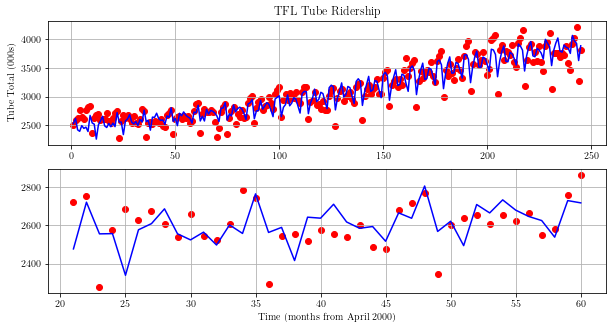

In [12]:
# Your code here

combined_fit = fit + fit_sc
plt.subplot(2,1,1)
plt.scatter(xvals, yvals, color='red')
plt.plot(xvals, combined_fit, color='blue')
plt.title('TFL Tube Ridership')
plt.ylabel('Tube Total (000s)')
plt.grid()
plt.subplot(2,1,2)
plt.scatter(xvals[20:60], yvals[20:60], color='red')
plt.plot(xvals[20:60], combined_fit[20:60], color='blue')
plt.xlabel('Time (months from April 2000)')
plt.grid()


Mean squared error for the combined fit is 22945.968

This is an improvement over the linear fit, which had an MSE of 45323.636